In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib as mpl

In [372]:
L = 50  # Tamaño del sistema (LxL)
J = 1  # Energía de interacción entre espines
T = 2.5  # Temperatura

### Definición de funciones básicas

In [369]:
def calcular_energia(spins):
    energia = 0
    for i in range(L):
        for j in range(L):
            energia += -J * spins[i, j] * (spins[(i + 1) % L, j] +spins[(i - 1) % L, j]+ spins[i, (j + 1) % L]+spins[i, (j - 1) % L])
    return energia

def lista_aleatorios(L):
    lista = [0]*(L**2)
    for i in range(L**2):
        lista[i] = random.randint(0,L**2-1)
    return lista

def site_assign(N_i,L):
    i = int(N_i/L)
    j= N_i%L
    return i,j

def metropolis(spins,temperatura,n):
    i, j = site_assign(n,L)
    s = spins[i, j]
    suma_vecinos = (spins[(i + 1) % L, j] + spins[(i - 1) % L, j] + spins[i, (j + 1) % L] + spins[i, (j - 1) % L])
    delta_energia = 2 * J * s * suma_vecinos
    if delta_energia < 0:  
        spins[i, j] *= -1
    elif random.random() < np.exp(-delta_energia / temperatura):
        spins[i, j] *= -1
    return spins

def mag(T):
    if T > 2/np.log(1+np.sqrt(2)):
        return(0)
    else:
        return((1-(np.sinh(2/T))**(-4))**(1/8))
    
def calcular_magnetizacion(spins):
    return np.sum(spins) / (L * L)

def plot_ising(configspins):
    cmap = mpl.colors.ListedColormap(['r', 'b'])
    bounds = [-1., 0., 1.]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    plt.figure(figsize=(2, 2))
    plt.imshow(configspins, cmap=cmap, norm=norm)
    plt.title(('paso MC=%d'%paso))
    plt.yticks([],visible=False)
    plt.xticks([],visible=False)
    plt.show()

In [373]:
num_pasos =10000
spins = np.ones((L, L))
magnetizacion = []
energias = []
pasos_config = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,9999]
config = []

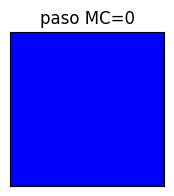

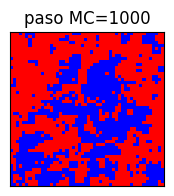

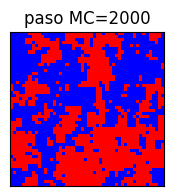

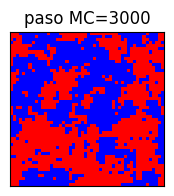

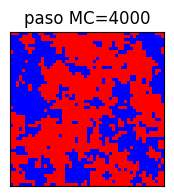

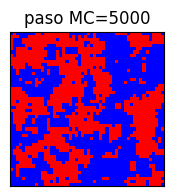

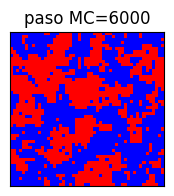

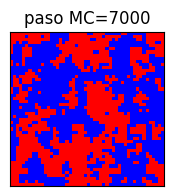

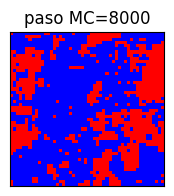

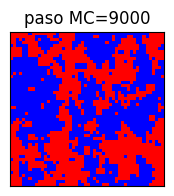

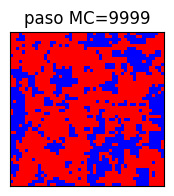

In [374]:

for paso in range(num_pasos):
    N = lista_aleatorios(L)
    energia = calcular_energia(spins)
    magnetizacion1 = calcular_magnetizacion(spins)
    if paso in pasos_config:
        plot_ising(spins)
    for k in range(len(N)):
        metropolis(spins,T,N[k])
    energias.append(energia)
    magnetizacion.append(magnetizacion1)
    